# Rapport Laforge - Hassouna Clustering

### Imporation des librairies à éxécuter .. 

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [41]:
#  Paramètres à modifier facilement
dataset_name = 'longsquare.arff'   # <-- change juste cette ligne quand tu veux un autre dataset

# --- Chargement du dataset ---
def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    # On suppose que la dernière colonne est une étiquette non numérique
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

file_path = os.path.join('../dataset', 'artificial', dataset_name)
X = load_arff_data(file_path)
print("Shape du dataset :", X.shape)

# --- Standardisation des données (important pour K-Means) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Shape du dataset : (900, 2)


##### importation d'une data set et affichage sans aucune intervention

Shape du dataset : (2990, 2)


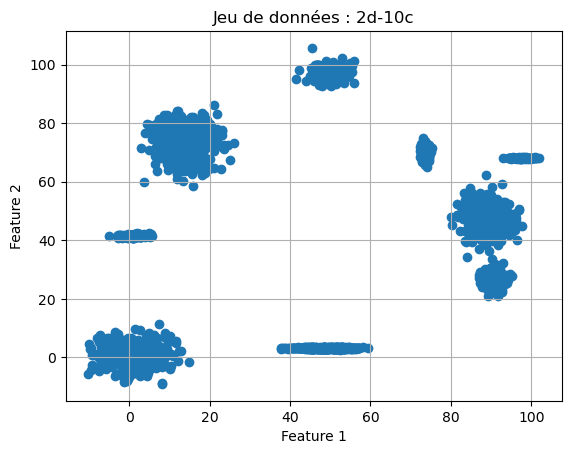

In [31]:
def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    # On suppose que la dernière colonne est une étiquette non numérique
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

file_path = os.path.join('../dataset', 'artificial', '2d-10c.arff')

X = load_arff_data(file_path)
print("Shape du dataset :", X.shape)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Jeu de données : 2d-10c")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## K-means : 

Silhouette Score = 0.549


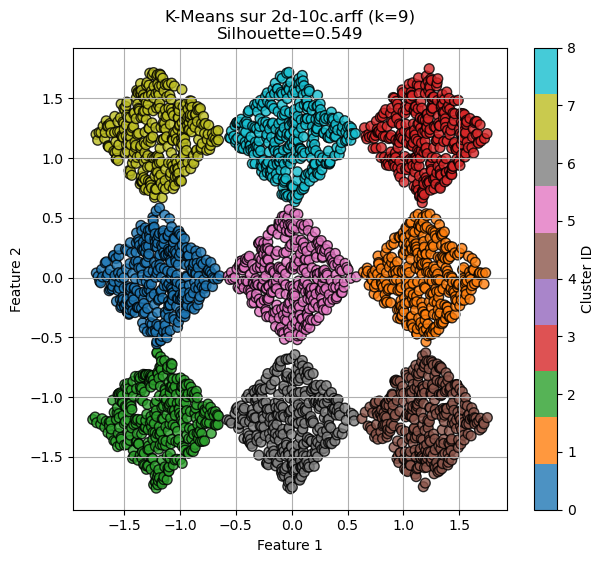

In [32]:


# --- Application de K-Means ---
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# --- Évaluation de la qualité du clustering ---
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score = {silhouette:.3f}")

# --- Affichage des clusters ---
plt.figure(figsize=(7, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolor='k')
plt.title(f"K-Means sur 2d-10c.arff (k={k})\nSilhouette={silhouette:.3f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()

### Exemple Réussi: diamond9.arff avec K = 9 
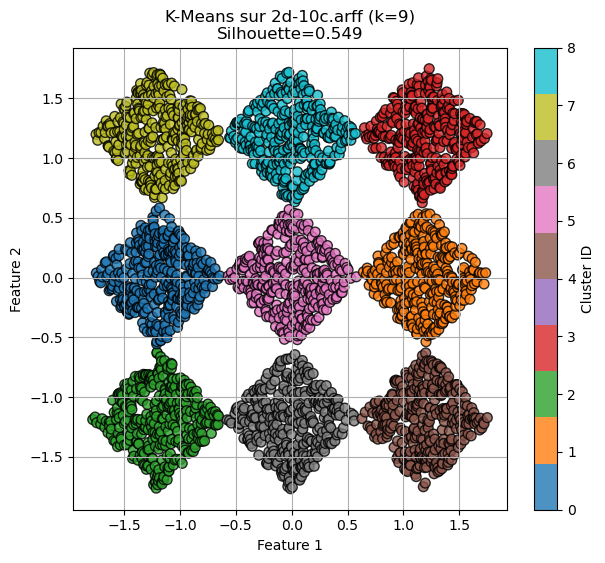


pourquoi ? : 


### Explication des avantages de K-mean 

### Exemple non Réussi de K-mean banana.arff  k=2


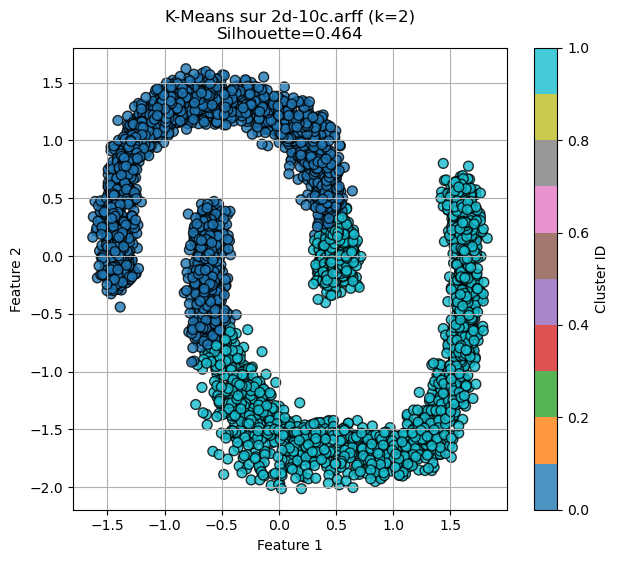*

pourquoi ? : 

### Automatisation de choix des paramètres et détection du meilleur DataSet pour K-mean

In [ ]:
# à remplir 

## Clustering Agglomératif  

#### Exemple Réussi de Agglomératif : banana.arff avec linkage = single

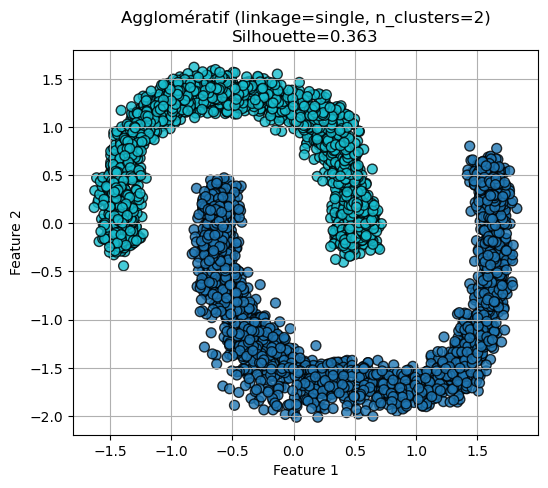

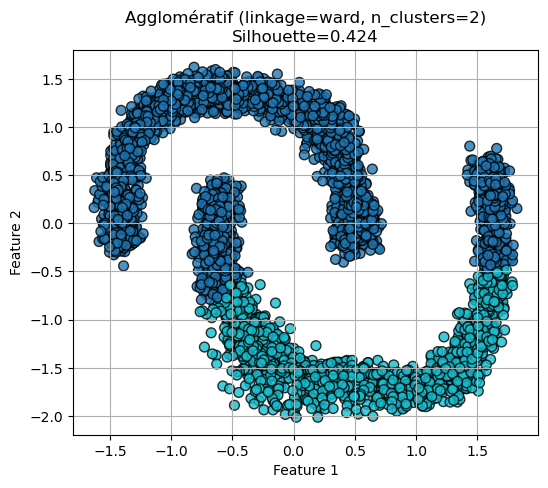

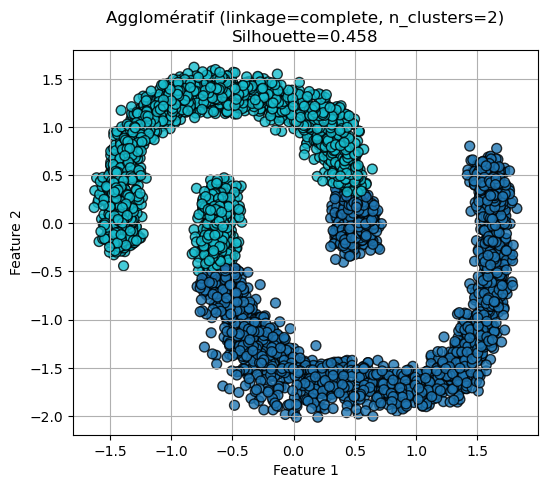

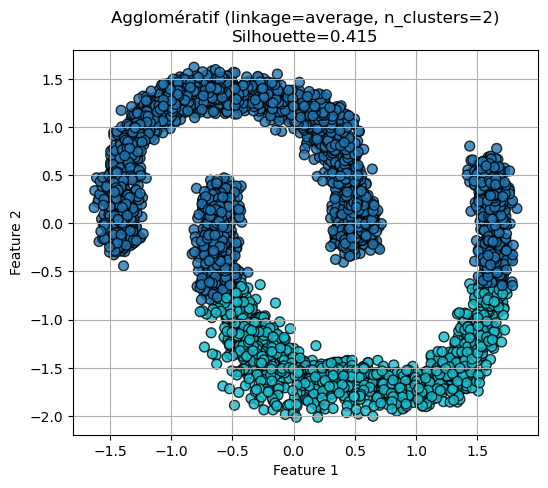

In [40]:
from sklearn.cluster import AgglomerativeClustering
# --- Paramètres à tester ---
n_clusters_list = [2]
linkage_list = ['single','ward', 'complete', 'average']

for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        # ward ne fonctionne qu’avec la distance euclidienne
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='euclidean')
        
        labels = model.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)

        plt.figure(figsize=(6, 5))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolor='k')
        plt.title(f"Agglomératif (linkage={linkage}, n_clusters={n_clusters})\nSilhouette={silhouette:.3f}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid(True)
        plt.show()

### Exemple Réussi : 
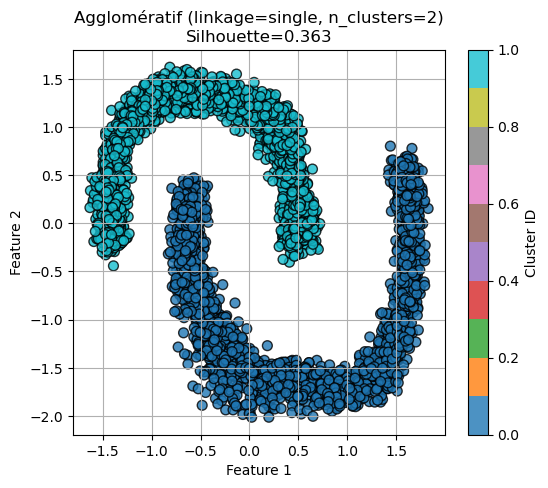

### Comparaison entre les linkages et Analyse

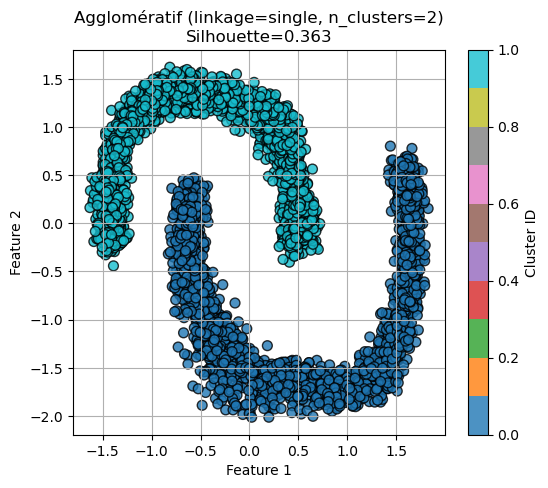
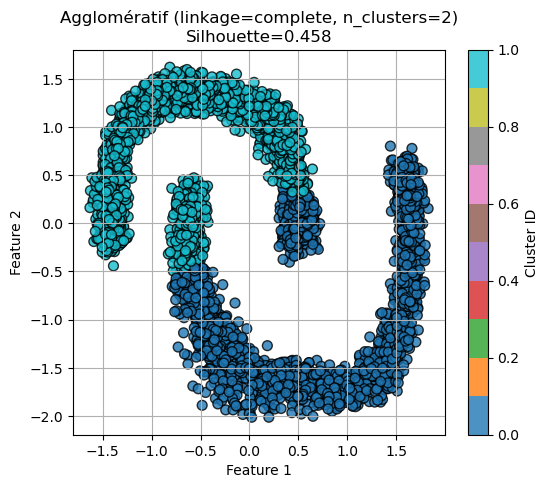
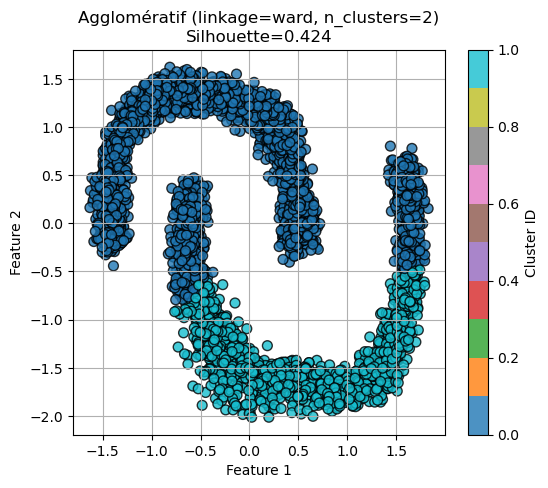
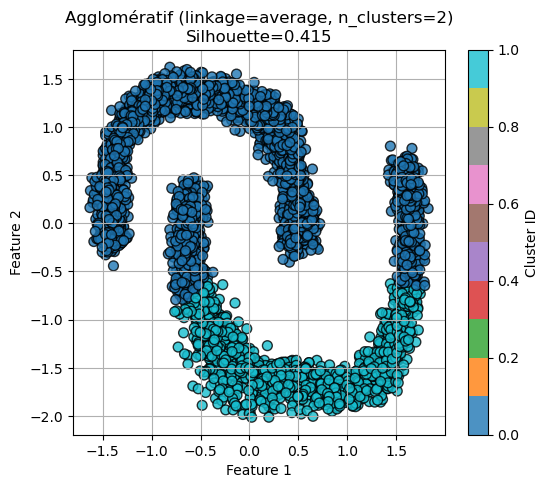



### Interprétation :

????????????

### avec le meme linkage mais K variant le Dataset 

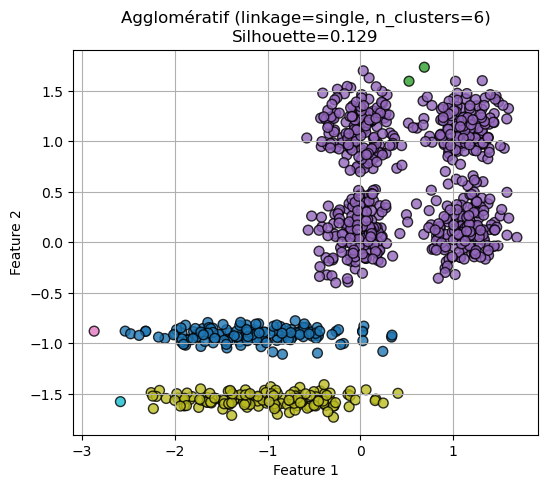

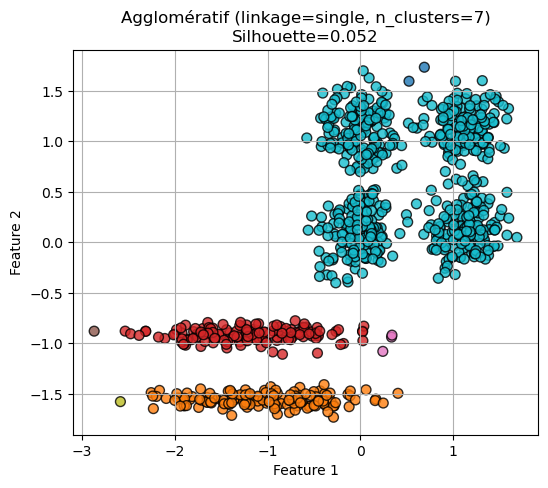

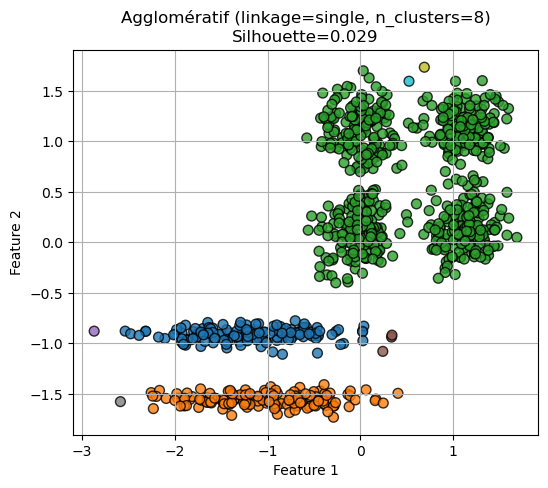

In [43]:
from sklearn.cluster import AgglomerativeClustering
# --- Paramètres à tester ---
n_clusters_list = [6,7,8]
linkage_list = ['single']

for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        # ward ne fonctionne qu’avec la distance euclidienne
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='euclidean')
        
        labels = model.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)

        plt.figure(figsize=(6, 5))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolor='k')
        plt.title(f"Agglomératif (linkage={linkage}, n_clusters={n_clusters})\nSilhouette={silhouette:.3f}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid(True)
        plt.show()